<a href="https://colab.research.google.com/github/irubiales/Aquarium/blob/main/Bajada_ph_240.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bajada kh y ph en 240

Acid Buffer: 6 grm diarios

In [9]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
# Muestrar los gráficos integrados dentro de jupyter notebook
%matplotlib inline
pd.options.mode.chained_assignment = None #Para que no de error de asignación
#################################################################################################
# Datos de entrada para el cálculo
kh_agua_red=6
litros_totales=240
litros_cambio=20
kh_deseado=3

#################################################################################################
#Datos de referencia (No modificables)
grados_referente=0.6 #grados alemanes
dosis_referente =2 # 2gr por cada 80 litros
litros_referente=80


dosis_diaria=(litros_totales*dosis_referente)/litros_referente
grados_bajada=kh_agua_red-kh_deseado
dosis_necesaria=(dosis_diaria*grados_bajada)/grados_referente
dias_estimados=grados_bajada/grados_referente
kh_real_estimado=kh_agua_red-(dosis_necesaria*grados_referente)/dosis_diaria

# Dia 0 - kh entrada, kh salida, ph, tds
heads=['dia','fecha','kh_e','dosis','kh_s','ph','tds'] #,'no2','no3','po4']
#dia_0 = [ (0,'2023-03-31','10:00',5.9,False,5.9,7.6,162)]
#df=pd.DataFrame(np.nan,columns=heads)

df=pd.DataFrame(columns=heads)
#Resumen total
def addResumen(resumen,d,v,m):
    resumen=resumen.append(
        {"Descripción":d,"Valor":v,"Medida":m}
        ,ignore_index=True)
    return resumen

r=pd.DataFrame(columns=["Descripción","Valor","Medida"])
r=addResumen(r,"Litros totales",litros_totales,"litros")
r=addResumen(r,"Grados de Bajada por cada dosis",grados_referente,"dHK")
r=addResumen(r,"Dosis diaria",dosis_diaria,"gr")
r=addResumen(r,'Kh Real',kh_agua_red,"dHK")
r=addResumen(r,'Kh Deseado',kh_deseado,"dHK")
r=addResumen(r,'Kh Real Estimado',kh_real_estimado,"dHK")
r=addResumen(r,'Grados de bajada deseados',grados_bajada,"dHK")
r=addResumen(r,'Dias estimados',dias_estimados,"")
r=addResumen(r,'Dosis necesaria total',dosis_necesaria,"gr")
r=addResumen(r,"Cambios de agua", litros_cambio,"litros")
r=addResumen(r,'Dosis futuras',litros_cambio*dosis_necesaria/litros_totales,"gr")

r


,Descripción,Valor,Medida
0,Litros totales,240,litros
1,Grados de Bajada por cada dosis,0.6,dHK
2,Dosis diaria,6.0,gr
3,Kh Real,6,dHK
4,Kh Deseado,3,dHK
5,Kh Real Estimado,3.0,dHK
6,Grados de bajada deseados,3,dHK
7,Dias estimados,5.0,
8,Dosis necesaria total,30.0,gr
9,Cambios de agua,20,litros


In [2]:
def recalcular(df):
    df2=df.sort_values(['fecha'])
    kh_inicial=kh_agua_red #df2['kh_s'][0]
    for i in range(0,len(df)):        
        if i==0:
            df2['kh_e'][i]=kh_inicial            
        else:
            df2['kh_e'][i]=df2['kh_s'][i-1]
        if df2['dosis'][i]:
            df2['kh_s'][i]=df2['kh_e'][i]-grados_referente
        else:
            df2['kh_s'][i]=df2['kh_e'][i]
    return df2

def add(df,fecha,dia,dosis,ph,tds):        
    df2=df.sort_values(['fecha'])
    #Recalculamos
    if len(df)==0: #Sólo tiene un registro
        kh_inicial=kh_agua_red
    else:
        kh_inicial=df['kh_s'][len(df)-1] 
    if dosis:
        dosis_valor = 1
    else:
        dosis_valor=0
    #if index==len(df): #añadimos fila
    df2=df.append({'fecha':pd.to_datetime(fecha),'dia':dia,'kh_e':kh_inicial,'dosis':dosis,'kh_s':kh_inicial-0.6,'ph':ph,'tds':tds} , ignore_index=True)        
    df2=recalcular(df2)
    return df2
    #else:
    #    df2=df.copy()
  #      df2.loc[index].fecha=fecha
  #      df2.loc[index].kh_e=kh_inicial
  #      df2.loc[index].dosis=dosis
  #      df2.loc[index].kh_s=kh_inicial-0.6
  #      df2.loc[index].ph=ph
  #      df2.loc[index].tds=tds


In [3]:
#dia 1
df=add(df,'2023-03-31 10:00',1,False,7.6,162) 
df=add(df,'2023-03-31 18:30',1,True,7.6,162) 
df=add(df,'2023-03-31 22:00',1,False,6.8,205) 

In [4]:
#dia 2
df=add(df,'2023-04-01 10:00',2,True,7.6,206) 
df=add(df,'2023-04-01 18:00',2,False,7,225) 
df=add(df,'2023-04-01 20:20',2,False,7,225) 

In [5]:
#dia 3 
df=add(df,'2023-04-02 09:00',3,False,7.4,225)
df=add(df,'2023-04-02 22:00',3,True,7.4,225)

In [6]:
#dia 4
df=add(df,'2023-04-03 09:00',4,True,7,225)
df=add(df,'2023-04-03 21:00',4,False,7,235)

In [7]:
#dia 5
df=add(df,'2023-04-04 10:30',5,True,7,246)
df=add(df,'2023-04-04 12:30',5,False,7,261)

# Informe

Según los cálculos realizados y las mediciones tomadas estos son los resultados:

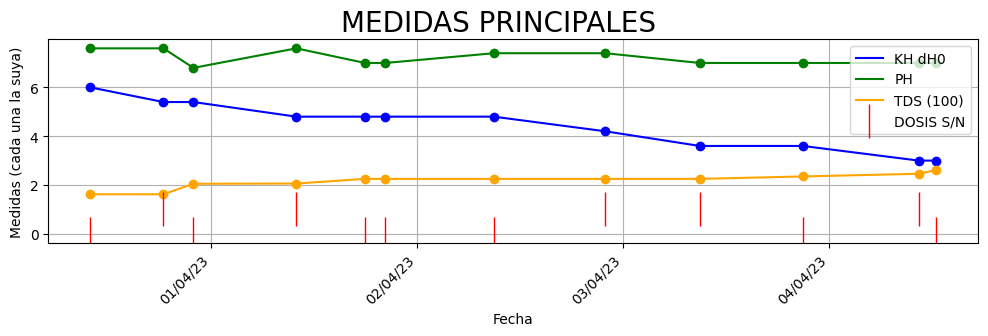

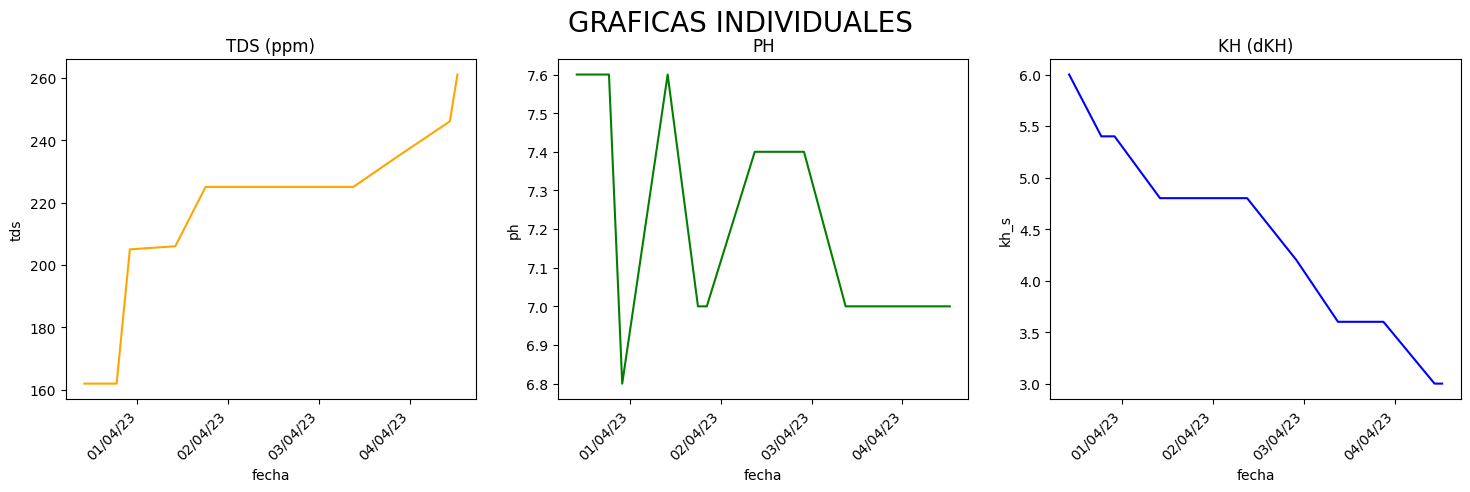

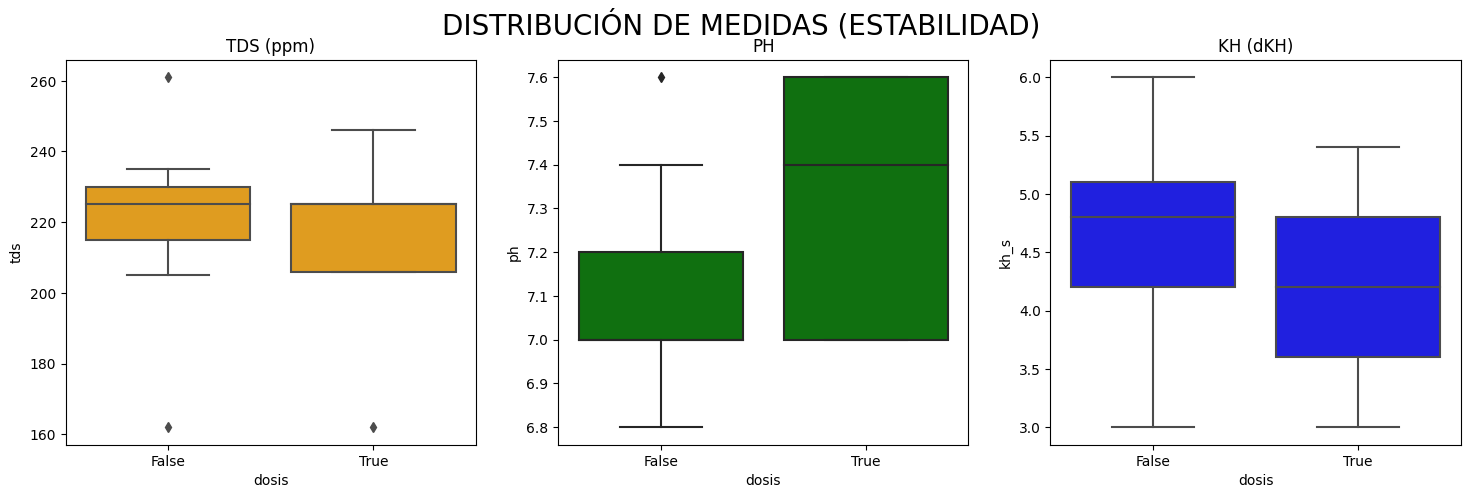

,Descripción,Valor,Medida
0,Litros totales,240,litros
1,Grados de Bajada por cada dosis,0.6,dHK
2,Dosis diaria,6.0,gr
3,Kh Real,6,dHK
4,Kh Deseado,3,dHK
5,Kh Real Estimado,3.0,dHK
6,Grados de bajada deseados,3,dHK
7,Dias estimados,5.0,
8,Dosis necesaria total,30.0,gr
9,Cambios de agua,20,litros


In [8]:
df=df.tail(20) #Muestro las últimas 10 mediciones
#Preparamos los datos para el gráfico
Y = np.array(df['kh_s'])
Y2= np.array(df['ph'])
Y3= np.array(df['tds']/100.00) # divido entre 100 para que quede en el gráfico
Y4=np.array(df["dosis"])
X4=np.array(pd.to_datetime(df['fecha'][df["dosis"]==True]))
X=np.array(pd.to_datetime(df['fecha']))

fig,ax = plt.subplots(figsize=(12, 3))
ax.set_xlabel('Fecha')
ax.set_ylabel('Medidas (cada una la suya)')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y')) 
fig.autofmt_xdate(rotation=45)
fig.suptitle('MEDIDAS PRINCIPALES',fontsize=20)
plt.plot(X, Y,"bo")
plt.plot(X, Y,"b",label="KH dH0")
plt.plot(X, Y2,'go')
plt.plot(X, Y2,'g',label="PH")
plt.plot(X, Y3,label="TDS (100)",color="orange")
plt.plot(X, Y3,'o',color="orange")
plt.plot(X,Y4,"|",color="red",linewidth=4, markersize=24,label="DOSIS S/N")
plt.legend(loc="upper right")
plt.grid()
plt.show()

#Medidas individuales
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('GRAFICAS INDIVIDUALES',fontsize=20)
fig.autofmt_xdate(rotation=45)
axes[0].set_title("TDS (ppm)")
axes[1].set_title("PH")
axes[2].set_title("KH (dKH)")
for i in range(0,len(axes)):
    axes[i].xaxis.set_major_locator(mdates.DayLocator(interval=1))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y')) 
sns.lineplot(ax=axes[0], data=df, x='fecha',y='tds',color="orange")
sns.lineplot(ax=axes[1], data=df, x='fecha',  y='ph' ,color="green")
sns.lineplot(ax=axes[2], data=df, x='fecha',  y='kh_s',color="blue")
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('DISTRIBUCIÓN DE MEDIDAS (ESTABILIDAD)',fontsize=20)
axes[0].set_title("TDS (ppm)")
axes[1].set_title("PH")
axes[2].set_title("KH (dKH)")

sns.boxplot(ax=axes[0], data=df, x='dosis',  y='tds',color="orange")
sns.boxplot(ax=axes[1], data=df, x='dosis',  y='ph' ,color="green")
sns.boxplot(ax=axes[2], data=df, x='dosis',  y='kh_s',color="blue")
plt.show()
r.head(20)